# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Amanda Hanway
### Repository: https://github.com/mandi1120/web-scraping 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

----------------
### QUESTION 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle
from bs4 import BeautifulSoup

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

# create pickle file for exercises
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)
    
# create html file to submit   
soup = BeautifulSoup(article_html, 'html5lib')    
article_content = soup.find('article')    
with open("how-laser-headlights-work.html", "w", encoding = 'utf-8') as file:
    file.write(article_content.get_text())

----------------
### QUESTION 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
from bs4 import BeautifulSoup

with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)
    
soup = BeautifulSoup(article_html, 'html5lib')    
article_content = soup.find('article')    
print(article_content.get_text())    


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

----------------
### QUESTION 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [2]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# count word frequency 
word_freq = Counter(map(str,interesting_tokens))
five_most_common = word_freq.most_common(5)

# print 5 most common word tokens
print("5 most common tokens:\n ", five_most_common)

# print 5 most common word tokens with appropriate labels & frequencies
print("\n5 most common tokens with appropriate labels and frequencies:") 
c = 0
for x in five_most_common:
    c +=1
    print(f"  #{c} Most common token is", '\x1b[1m'+str(five_most_common[c-1][0])+'\x1b[0m', 
          "with a count of", '\x1b[1m'+str(five_most_common[c-1][1])+'\x1b[0m') 

5 most common tokens:
  [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]

5 most common tokens with appropriate labels and frequencies:
  #1 Most common token is laser with a count of 35
  #2 Most common token is headlights with a count of 19
  #3 Most common token is headlight with a count of 11
  #4 Most common token is technology with a count of 10
  #5 Most common token is led with a count of 10


----------------
### QUESTION 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# count lemma frequency 
lemma_freq = Counter(interesting_lemmas)
five_most_common = lemma_freq.most_common(5)

# print 5 most common lemmas
print("5 most common lemmas:\n ", five_most_common)

# print 5 most common lemmas with appropriate labels & frequencies
print("\n5 most common lemmas with appropriate labels and frequencies:") 
c = 0
for x in five_most_common:
    c +=1
    print(f"  #{c} Most common lemma is", '\x1b[1m'+str(five_most_common[c-1][0])+'\x1b[0m', 
          "with a count of", '\x1b[1m'+str(five_most_common[c-1][1])+'\x1b[0m') 

5 most common lemmas:
  [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]

5 most common lemmas with appropriate labels and frequencies:
  #1 Most common lemma is laser with a count of 40
  #2 Most common lemma is headlight with a count of 28
  #3 Most common lemma is beam with a count of 12
  #4 Most common lemma is led with a count of 11
  #5 Most common lemma is technology with a count of 10


----------------
### QUESTION 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [4]:
class NLP:

    # create a function that takes a sentence and a list of interesting tokens 
    # and returns the number of times that any of the interesting words appear 
    # in the sentence divided by the number of words in the sentence
    def score_sentence_by_token(sentence, interesting_token):
        
        print("\n------------ SCORE SENTENCE BY TOKEN ------------\n")
        print("Sentence Provided:\n ", sentence, "\n")
        print("Tokens Provided:\n ", interesting_token, "\n")      
        
        # load sentence text into trained spaCy pipeline
        nlp = spacy.load('en_core_web_sm')
        nlp.add_pipe('spacytextblob')
        doc = nlp(sentence) 

        # create a function to remove whitepace, stopwords, and punctuation
        def we_care_about(token):
            return not (token.is_space or token.is_punct or token.is_stop)

        # remove whitespace, stopwords, and punctuation & make text lowercase on the sentence
        interesting_tokens_sentence = [token.text.lower() for token in doc if we_care_about(token)]
        #print("Interesting Tokens in Sentence:\n ", interesting_tokens_sentence, "\n")

        # count frequency of interesting tokens in the sentence
        word_freq = dict(Counter(map(str,interesting_tokens_sentence)))
        #print("Frequency of Interesting Tokens in Sentence:\n ", word_freq, "\n")

        # if the sentence token was not in the provided list of interesting tokens, remove it
        tokens_in_list = word_freq
        for key in list(tokens_in_list.keys()):
              if key not in interesting_token:
                 del tokens_in_list[key]
        #print(tokens_in_list)

        # if the provided token was not in the sentence, add it with 0 count
        for i in list(interesting_token):
              if i not in tokens_in_list:
                 tokens_in_list[i] =  0
        #print(tokens_in_list)

        # count total words in the sentence
        total_count = 0
        for token in doc:
            if not(token.is_space or token.is_punct):
                total_count += 1
        # print("\nTotal Words in the Sentence:", total_count)

        # return the number of times any of the interesting words appear in the sentence 
        # divided by the number of words in the sentence
        print("Tokens with Frequency and Score:")
        for key, value in word_freq.items():
            score = value/total_count
            print(f"  Token: {key},  Frequency: {value},  Score: {round(score,2)}")
        print("\n------------------ END ------------------\n")

    # create a function that takes a sentence and a list of interesting lemmas 
    # and returns the number of times that any of the interesting lemmas appear 
    # in the sentence divided by the number of words in the sentence
    def score_sentence_by_lemma(sentence, interesting_lemmas):
        
        print("\n------------ SCORE SENTENCE BY LEMMA ------------\n")
        print("Sentence Provided:\n ", sentence, "\n")
        print("Lemmas Provided:\n ", interesting_lemmas, "\n")      
        
        # load sentence text into trained spaCy pipeline
        nlp = spacy.load('en_core_web_sm')
        nlp.add_pipe('spacytextblob')
        doc = nlp(sentence) 

        # create a function to remove whitepace, stopwords, and punctuation
        def we_care_about(token):
            return not (token.is_space or token.is_punct or token.is_stop)

        # remove whitespace, stopwords, and punctuation & make text lowercase on the sentence
        interesting_lemmas_sentence = [token.lemma_.lower() for token in doc if we_care_about(token)]
        #print("Interesting Lemmas in Sentence:\n ", interesting_lemmas_sentence, "\n")

        # count frequency of interesting lemmas in the sentence
        lemma_freq = dict(Counter(interesting_lemmas_sentence))
        #print("Frequency of Interesting Lemmas in Sentence:\n ", lemma_freq, "\n")

        # if the sentence lemma was not in the provided list of interesting lemmas, remove it
        lemmas_in_list = lemma_freq
        for key in list(lemmas_in_list.keys()):
              if key not in interesting_lemmas:
                 del lemmas_in_list[key]
        #print(lemmas_in_list)

        # if the provided lemma was not in the sentence, add it with 0 count
        for i in list(interesting_lemmas):
              if i not in lemmas_in_list:
                 lemmas_in_list[i] =  0
        #print(lemmas_in_list)

        # count total words in the sentence
        total_count = 0
        for token in doc:
            if not(token.is_space or token.is_punct):
                total_count += 1
        # print("\nTotal words in sentence:", total_count)

        # return the number of times any of the interesting lemmas appear in the sentence 
        # divided by the number of words in the sentence
        print("Lemmas with Frequency and Score:")
        for key, value in lemma_freq.items():
            score = value/total_count
            print(f"  Lemma: {key},  Frequency: {value},  Score: {round(score,2)}")
        print("\n------------------ END ------------------\n")
        
        
# Run the Token method
sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind." 
interesting_token = ['laser', 'headlights', 'headlight', 'technology', 'led']
NLP.score_sentence_by_token(sentence, interesting_token)

# Run the Lemma method
sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind." 
interesting_lemmas = ['laser', 'headlight', 'beam', 'led', 'technology']
NLP.score_sentence_by_lemma(sentence, interesting_lemmas)


------------ SCORE SENTENCE BY TOKEN ------------

Sentence Provided:
  When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. 

Tokens Provided:
  ['laser', 'headlights', 'headlight', 'technology', 'led'] 

Tokens with Frequency and Score:
  Token: technology,  Frequency: 1,  Score: 0.05
  Token: headlights,  Frequency: 1,  Score: 0.05
  Token: laser,  Frequency: 0,  Score: 0.0
  Token: headlight,  Frequency: 0,  Score: 0.0
  Token: led,  Frequency: 0,  Score: 0.0

------------------ END ------------------


------------ SCORE SENTENCE BY LEMMA ------------

Sentence Provided:
  When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. 

Lemmas Provided:
  ['laser', 'headlight', 'beam', 'led', 'technology'] 

Lemmas with Frequency and Score:
  Lemma: technology,  Frequency: 1,  Score: 0.05
  Lemma: headlight,  Frequency: 1,  Score: 0.05
  Lemma: laser

----------------
### QUESTION 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

5 MOST COMMON WORDS: {'headlight', 'led', 'technology', 'headlights', 'laser'} 

SCORE LIST: [0, 0.16667, 0.09524, 0.0, 0.0, 0.03846, 0.1, 1.0, 0.25, 0.13043, 0.0, 0.14286, 0.25, 0.0, 0.04545, 0.22222, 0.0, 0.1875, 0.15, 0.09091, 0.07692, 0.05263, 0.0, 0.04545, 0.07407, 0.03846, 0.0, 0.03333, 0.29412, 0.05556, 0.0, 0.14286, 0.15152, 0.05263, 0.05556, 0.12903, 0.0, 0.0, 0.0, 0.07143, 0.07143, 0.0, 0.0, 0.04, 0.05556, 0.125, 0.07317, 0.03226, 0.08333, 0.11111, 0.04, 0.12, 0.06061, 0.08696, 0.07407, 0.0, 0.0, 0.4]


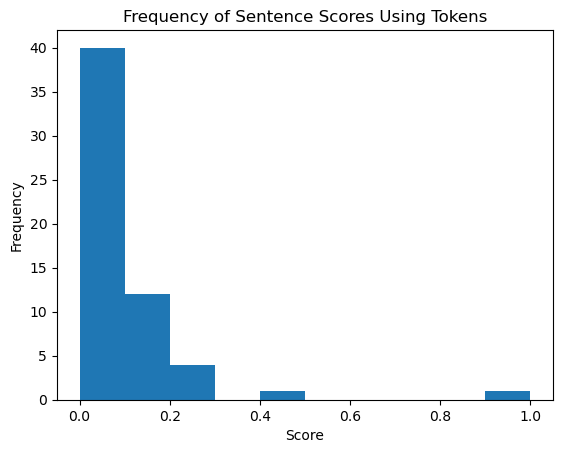

'ANSWER: The most common range of scores is 0 to 0.1.'

In [5]:
# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# count word frequency 
word_freq = Counter(map(str,interesting_tokens))

# important words, 5 most common 
cool_words = set()
for word, freq in word_freq.most_common(5):
    cool_words.add(word)
print("5 MOST COMMON WORDS:", cool_words, "\n")

# count number of words in each sentence
# print("----------- COUNT OF WORDS PER SENTENCE: -----------")
sentences = list(doc.sents)
sentence_count = 0
sentence_score_list = list()

for sentence in sentences:
    sentence_count +=1
    important_count = 0
    total_count = 0
    
    for token in sentence:
        #count important words in sentence
        if token.text.lower() in cool_words:
            important_count += 1
        
        #count total words in sentence
        if not(token.is_space or token.is_punct):
            total_count += 1
    
    score = 0 if total_count == 0 else round(important_count/total_count, 5)
    sentence_score_list.append(score)
    
    # print results
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    '''print(str(sentence_count)+".",
          "Total words:", total_count, 
          ", Important words:", important_count, 
          ", Score:", score,
          "\nSentence:", sent_str, "\n")'''  
    
#print("--------------------- END ---------------------")
print("SCORE LIST:", sentence_score_list)

# plot a histogram with scores
import matplotlib.pyplot as plt
plt.hist(sentence_score_list)
plt.title('Frequency of Sentence Scores Using Tokens')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

'''QUESTION: From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?'''
'''ANSWER: The most common range of scores is 0 to 0.1.'''

----------------
### QUESTION 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

5 MOST COMMON LEMMAS: {'headlight', 'led', 'technology', 'laser', 'beam'} 

SCORE LIST: [0, 0.08333, 0.09524, 0.0, 0.0, 0.11538, 0.2, 0.5, 0.25, 0.17391, 0.04762, 0.14286, 0.25, 0.125, 0.04545, 0.22222, 0.04545, 0.1875, 0.15, 0.09091, 0.11538, 0.05263, 0.05, 0.04545, 0.11111, 0.03846, 0.0, 0.03333, 0.29412, 0.08333, 0.0, 0.14286, 0.15152, 0.10526, 0.05556, 0.09677, 0.0, 0.0, 0.0, 0.07143, 0.14286, 0.02857, 0.0, 0.04, 0.11111, 0.125, 0.09756, 0.06452, 0.08333, 0.11111, 0.04, 0.12, 0.06061, 0.08696, 0.07407, 0.0, 0.04545, 0.4]


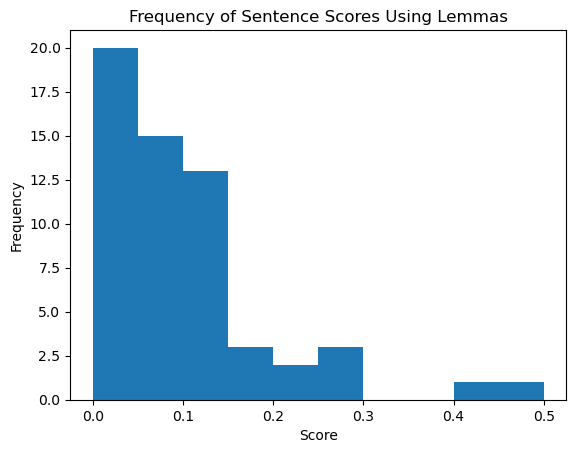

'ANSWER: The most common range of scores is 0 to 0.05.'

In [6]:
# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# count word frequency 
lemma_freq = Counter(interesting_lemmas)

# interesting lemmas, 5 most common 
cool_lemmas = set()
for l, freq in lemma_freq.most_common(5):
    cool_lemmas.add(l)
print("5 MOST COMMON LEMMAS:", cool_lemmas, "\n")

# count number of words in each sentence
sentences = list(doc.sents)
sentence_score_list = list()

for sentence in sentences:
    important_count = 0
    total_count = 0
    
    for token in sentence:
        #count important words in sentence
        if token.lemma_.lower() in cool_lemmas:
            important_count += 1
        
        #count total words in sentence
        if not(token.is_space or token.is_punct):
            total_count += 1
    
    score = 0 if total_count == 0 else round(important_count/total_count, 5)
    sentence_score_list.append(score)
    
print("SCORE LIST:", sentence_score_list)

# plot a histogram with scores
import matplotlib.pyplot as plt
plt.hist(sentence_score_list)
plt.title('Frequency of Sentence Scores Using Lemmas')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

'''QUESTION: From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?'''
'''ANSWER: The most common range of scores is 0 to 0.05.'''

----------------
### QUESTION 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

#### Answer:

In question 3, the token "led" would be removed from the list of the top 5 most common tokens, and replaced with "beam".

In question 4, no lemmas would be removed from the list of the top 5 most common lemmas.

The spaCy .pos_ tag can be used to identify and keep only the nouns in the text:

    def we_care_about(token):
        if token.pos_ == 'PROPN' or token.pos_ == 'NOUN' and not (token.is_space or token.is_punct or token.is_stop):
            return token 

------------


In [7]:
# QUESTION 3 UPDATED TO INCLUDE ONLY NOUNS

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
# Updated to include only nouns
def we_care_about(token):
    if token.pos_ == 'PROPN' or token.pos_ == 'NOUN' and not (token.is_space or token.is_punct or token.is_stop):
        return token 

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# count word frequency 
word_freq = Counter(map(str,interesting_tokens))
five_most_common = word_freq.most_common(5)

# print 5 most common word tokens
print("5 most common tokens (Nouns Only):\n ", five_most_common)

# print 5 most common word tokens with appropriate labels & frequencies
print("\n5 most common tokens (Nouns Only) with appropriate labels and frequencies:") 
c = 0
for x in five_most_common:
    c +=1
    print(f"  #{c} Most common token is", '\x1b[1m'+str(five_most_common[c-1][0])+'\x1b[0m', 
          "with a count of", '\x1b[1m'+str(five_most_common[c-1][1])+'\x1b[0m')   

5 most common tokens (Nouns Only):
  [('laser', 35), ('headlights', 19), ('technology', 10), ('headlight', 10), ('beam', 7)]

5 most common tokens (Nouns Only) with appropriate labels and frequencies:
  #1 Most common token is laser with a count of 35
  #2 Most common token is headlights with a count of 19
  #3 Most common token is technology with a count of 10
  #4 Most common token is headlight with a count of 10
  #5 Most common token is beam with a count of 7


In [8]:
# QUESTION 4 UPDATED TO INCLUDE ONLY NOUNS

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# load article text into trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

# create a function to remove whitepace, stopwords, and punctuation
def we_care_about(token):
    if token.pos_ == 'PROPN' or token.pos_ == 'NOUN' and not (token.is_space or token.is_punct or token.is_stop):
        return token  

# remove whitespace, stopwords, and punctuation & make text lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
#print(interesting_lemmas)

# count lemma frequency 
lemma_freq = Counter(interesting_lemmas)
five_most_common = lemma_freq.most_common(5)

# print 5 most common lemmas
print("5 most common lemmas (Nouns Only):\n ", five_most_common)

# print 5 most common lemmas with appropriate labels & frequencies
print("\n5 most common lemmas  (Nouns Only) with appropriate labels and frequencies:") 
c = 0
for x in five_most_common:
    c +=1
    print(f"  #{c} Most common lemma is", '\x1b[1m'+str(five_most_common[c-1][0])+'\x1b[0m', 
          "with a count of", '\x1b[1m'+str(five_most_common[c-1][1])+'\x1b[0m') 

5 most common lemmas (Nouns Only):
  [('laser', 40), ('headlight', 27), ('beam', 12), ('led', 11), ('technology', 10)]

5 most common lemmas  (Nouns Only) with appropriate labels and frequencies:
  #1 Most common lemma is laser with a count of 40
  #2 Most common lemma is headlight with a count of 27
  #3 Most common lemma is beam with a count of 12
  #4 Most common lemma is led with a count of 11
  #5 Most common lemma is technology with a count of 10
